In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
import cv2

from PIL import Image
import tensorflow.keras.layers as k
from tensorflow.keras.utils import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.utils import to_categorical

from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')


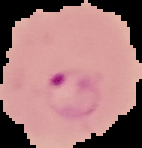

In [4]:
# Data loading and Visualising 

# Parasitized Image

load_img('kaggle/input/malarial-cell-image/Malarial Cell Image Data /cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png')

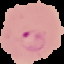

In [5]:
#changing the size of the image so that model trains on less features
load_img('kaggle/input/malarial-cell-image/Malarial Cell Image Data /cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png',target_size = (64,64))

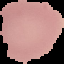

In [6]:
#Uninfected
load_img('kaggle/input/malarial-cell-image/Malarial Cell Image Data /cell_images/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_34.png',
        target_size = (64,64))

In [7]:
#setting the backend environment
os.environ['KERAS_BACKEND'] = 'tensorflow'
np.random.seed(312)

In [8]:
image_dir = 'kaggle/input/malarial-cell-image/Malarial Cell Image Data /malarial_cell_image_data/cell_images/cell_images/'
size = 64
dataset = []
label = []

In [9]:
para_imgs = os.listdir(image_dir + 'Parasitized/')

for conter,img in enumerate(tqdm(para_imgs)):
    if img.split('.')[1] == 'png':
        img_array = cv2.imread(image_dir + 'Parasitized/'+ img)
        img_array = Image.fromarray(img_array,'RGB')
        img_array = img_array.resize((size,size))
        
        dataset.append(np.array(img_array))
        label.append(0)

100%|██████████| 13780/13780 [00:58<00:00, 235.47it/s]


In [10]:
len(para_imgs)

13780

In [11]:
uninfected_img = os.listdir(image_dir + 'Uninfected/')

for conter,img in enumerate(tqdm(uninfected_img)):
    if img.split('.')[1] == 'png':
        img_array = cv2.imread(image_dir + 'Uninfected/'+ img)
        img_array = Image.fromarray(img_array,'RGB')
        img_array = img_array.resize((size,size))
        
        dataset.append(np.array(img_array))
        label.append(1)
        


100%|██████████| 13780/13780 [00:09<00:00, 1398.96it/s]


In [12]:
len(uninfected_img)

13780

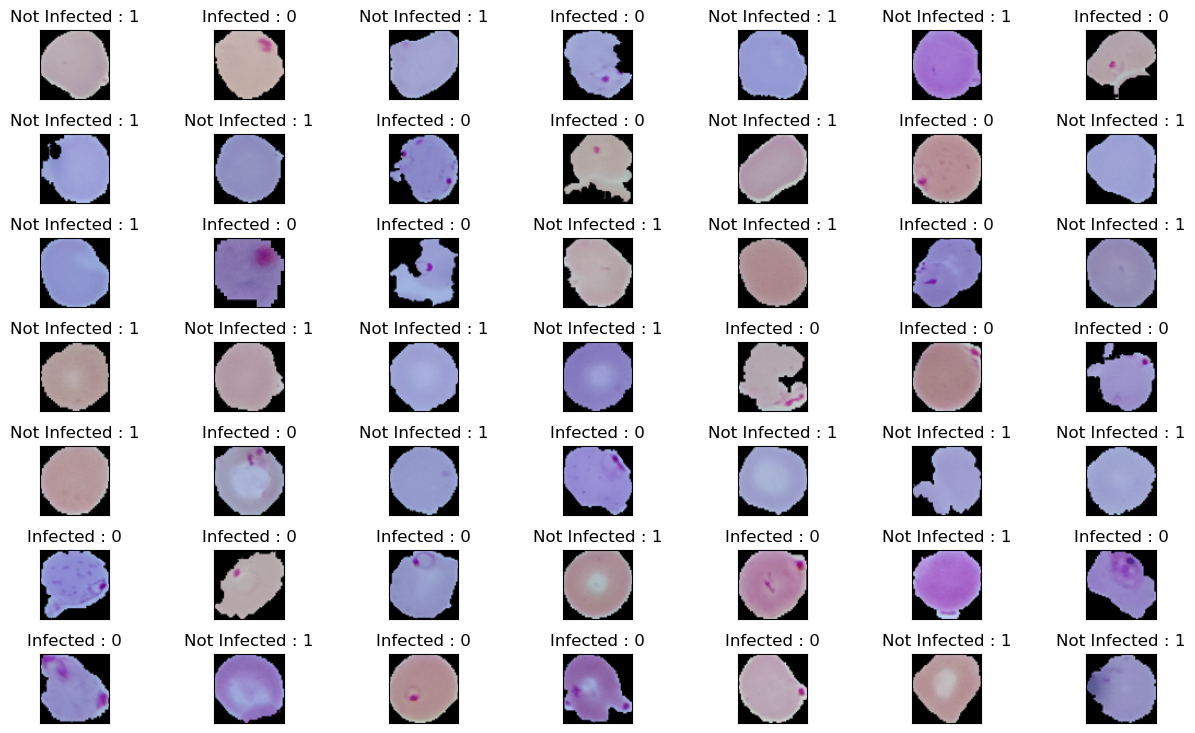

In [13]:
plt.figure(1 , figsize = (15 , 9))
n = 0 
for i in range(49):
    n += 1 
    r = np.random.randint(0 , len(dataset) , 1)
    plt.subplot(7 , 7 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    plt.imshow(dataset[r[0]])
    plt.title('{} : {}'.format('Not Infected' if label[r[0]] == 1 else 'Infected' ,
                               label[r[0]]) )
    plt.xticks([]) , plt.yticks([])
    
plt.show()

In [14]:
X_train,X_test,y_train,y_test = train_test_split(dataset,to_categorical(np.array(label)),test_size = 0.3,random_state = 0)

In [15]:
#CNN MODEL ARCHITECTURE
INPUT_SHAPE = (size,size,3)

inp = k.Input(shape = INPUT_SHAPE)
#second layer-convolution layer(filter)
conv1 = k.Conv2D(32,kernel_size = (3,3),activation = "relu",padding="same")(inp)
#pooling layer for dimension reduction
pool1 = k.MaxPool2D(pool_size=(2,2))(conv1)
#for unifiromity of data apply normalization
norm1 = k.BatchNormalization(axis=-1)(pool1)
#droping out some features so model will need to rethink
drop1 = k.Dropout(rate=0.2)(norm1)

conv2 = k.Conv2D(32,kernel_size = (3,3),activation = "relu",padding="same")(drop1)
pool2 = k.MaxPool2D(pool_size=(2,2))(conv2)
norm2 = k.BatchNormalization(axis=-1)(pool2)
drop2 = k.Dropout(rate=0.2)(norm2)

conv3 = k.Conv2D(32,kernel_size = (3,3),activation = "relu",padding="same")(drop2)
pool3 = k.MaxPool2D(pool_size = (2,2))(conv3)
norm3 = k.BatchNormalization(axis = -1)(pool3)
drop3 = k.Dropout(rate = 0.2)(norm3)

flat = k.Flatten()(drop3)

hidden1 = k.Dense(512,activation="relu")(flat)
norm3   = k.BatchNormalization(axis=-1)(hidden1)
drop3   = k.Dropout(rate=0.2)(norm3)

hidden2 = k.Dense(256,activation="relu")(drop3)
norm4   = k.BatchNormalization(axis=-1)(hidden2)
drop4   = k.Dropout(rate=0.2)(norm4)

out = k.Dense(2, activation='sigmoid')(drop4)


In [16]:
model = keras.Model(inputs = inp , outputs = out)
model.compile(optimizer = 'adam',loss='categorical_crossentropy',metrics = ['accuracy'])
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248  

In [17]:
history = model.fit(np.array(X_train),y_train,
                   batch_size= 128,verbose=1,epochs = 20,validation_split=0.1,shuffle=False)

Epoch 1/20


2023-08-14 11:26:49.411966: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 213331968 exceeds 10% of free system memory.
2023-08-14 11:26:51.580975: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 67108864 exceeds 10% of free system memory.


  1/136 [..............................] - ETA: 4:43 - loss: 1.0383 - accuracy: 0.5156

2023-08-14 11:26:51.831441: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 67108864 exceeds 10% of free system memory.
2023-08-14 11:26:51.927132: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 67108864 exceeds 10% of free system memory.


  2/136 [..............................] - ETA: 45s - loss: 0.9703 - accuracy: 0.5742 

2023-08-14 11:26:52.153452: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 67108864 exceeds 10% of free system memory.


136/136 [==============================] - 59s 422ms/step - loss: 0.6577 - accuracy: 0.6869 - val_loss: 0.7521 - val_accuracy: 0.6983
Epoch 2/20
136/136 [==============================] - 36s 267ms/step - loss: 0.2586 - accuracy: 0.9005 - val_loss: 1.5640 - val_accuracy: 0.7569
Epoch 3/20
136/136 [==============================] - 36s 264ms/step - loss: 0.1991 - accuracy: 0.9283 - val_loss: 0.4317 - val_accuracy: 0.8989
Epoch 4/20
136/136 [==============================] - 37s 269ms/step - loss: 0.1730 - accuracy: 0.9382 - val_loss: 0.3190 - val_accuracy: 0.9202
Epoch 5/20
136/136 [==============================] - 36s 264ms/step - loss: 0.1530 - accuracy: 0.9460 - val_loss: 0.3708 - val_accuracy: 0.9181
Epoch 6/20
136/136 [==============================] - 36s 262ms/step - loss: 0.1417 - accuracy: 0.9517 - val_loss: 0.2711 - val_accuracy: 0.9352
Epoch 7/20
136/136 [==============================] - 36s 262ms/step - loss: 0.1311 - accuracy: 0.9522 - val_loss: 0.2874 - val_accuracy: 0.9

In [18]:
print("Test accuracy: {:.2f}%".format(model.evaluate(np.array(X_test),np.array(y_test))[1]*100))

259/259 [==============================] - 4s 16ms/step - loss: 0.2201 - accuracy: 0.9530
Test accuracy: 95.30%


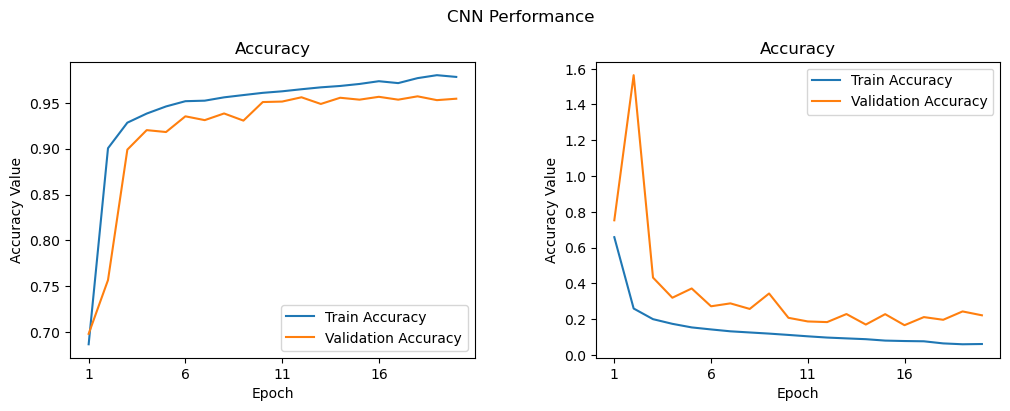

In [19]:
f,(ax1,ax2) = plt.subplots(1,2,figsize = (12,4))
t = f.suptitle('CNN Performance',fontsize=12)
f.subplots_adjust(top = 0.85, wspace=0.3)

max_epoch = len(history.history['accuracy'])+1
epoch_list = list(range(1,max_epoch))
ax1.plot(epoch_list,history.history['accuracy'],label = 'Train Accuracy')
ax1.plot(epoch_list,history.history['val_accuracy'],label = 'Validation Accuracy')
ax1.set_xticks(np.arange(1,max_epoch,5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc = "best")

ax2.plot(epoch_list,history.history['loss'],label = 'Train Accuracy')
ax2.plot(epoch_list,history.history['val_loss'],label = 'Validation Accuracy')
ax2.set_xticks(np.arange(1,max_epoch,5))
ax2.set_ylabel('Accuracy Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Accuracy')
l2 = ax2.legend(loc = "best")